PART 1: ANALYSIS TASKS (RELIANCE INDUSTRIES LIMITED)

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
reliance = yf.download("Reliance.NS", period = "2y", interval = "1d")
reliance.dropna(inplace=True)

/tmp/ipython-input-2214835650.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  reliance = yf.download("Reliance.NS", period = "2y", interval = "1d")
[*********************100%***********************]  1 of 1 completed


In [54]:
reliance.columns = reliance.columns.get_level_values(0)

In [55]:
reliance['SMA_50'] = reliance['Close'].rolling(window=50).mean()
reliance['SMA_200'] = reliance['Close'].rolling(window=200).mean()

In [56]:
print(reliance.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_50', 'SMA_200'], dtype='object', name='Price')


<function matplotlib.pyplot.show(close=None, block=None)>

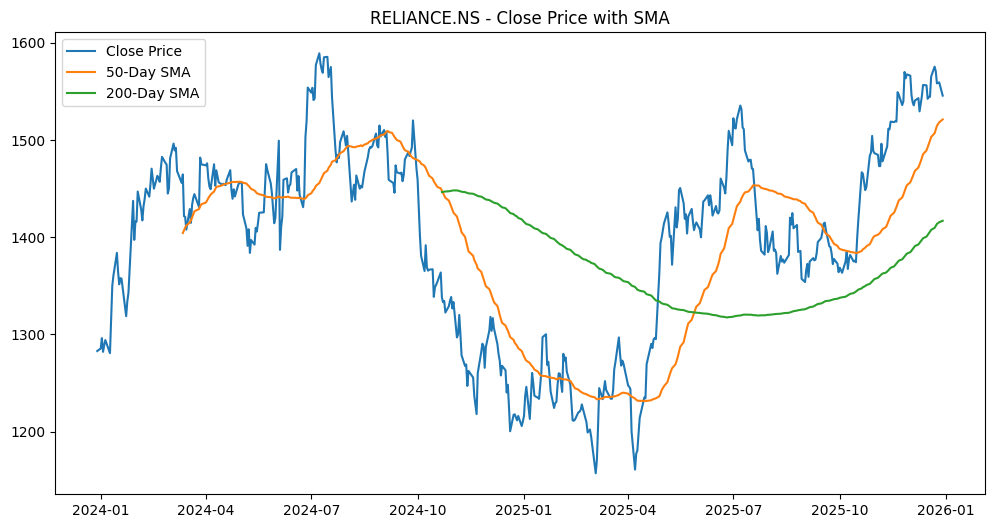

In [57]:
plt.figure(figsize=(12,6))
plt.plot(reliance['Close'], label='Close Price')
plt.plot(reliance['SMA_50'], label='50-Day SMA')
plt.plot(reliance['SMA_200'], label='200-Day SMA')
plt.title("RELIANCE.NS - Close Price with SMA")
plt.legend()
plt.show

In [58]:
reliance['Prev_Close'] = reliance['Close'].shift(1)

gap_up = reliance[reliance['Open'] > reliance['Prev_Close']]
gap_down = reliance[reliance['Open'] < reliance['Prev_Close']]

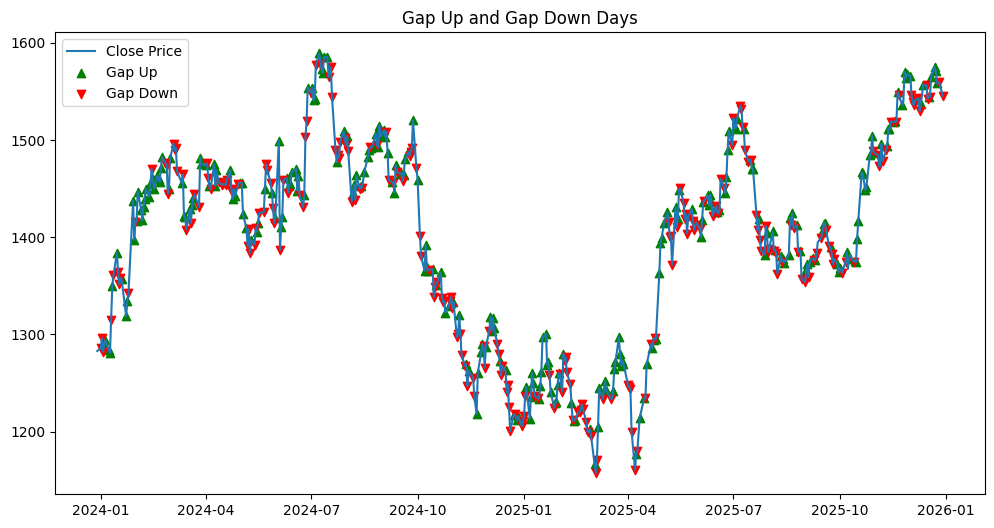

In [59]:
plt.figure(figsize=(12,6))
plt.plot(reliance['Close'], label='Close Price')

plt.scatter(gap_up.index, gap_up['Close'], color='green', label='Gap Up', marker='^')
plt.scatter(gap_down.index, gap_down['Close'], color='red', label='Gap Down', marker='v')

plt.title("Gap Up and Gap Down Days")
plt.legend()
plt.show()

In [60]:
intraday = yf.download("RELIANCE.NS", period="5d", interval="5m")
intraday.dropna(inplace=True)

/tmp/ipython-input-1959666084.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  intraday = yf.download("RELIANCE.NS", period="5d", interval="5m")
[*********************100%***********************]  1 of 1 completed


In [61]:
intraday['VWAP'] = (intraday['Close'] * intraday['Volume']).cumsum() / intraday['Volume'].cumsum()

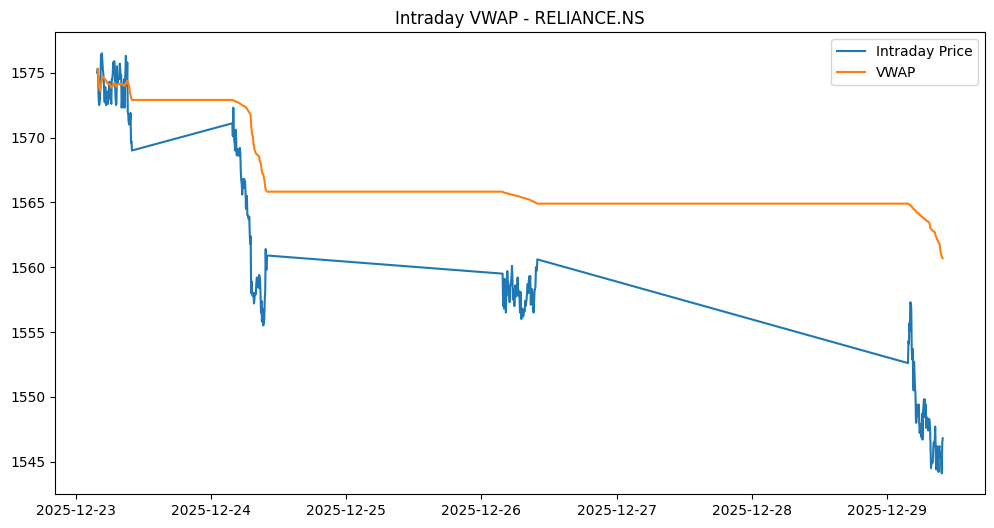

In [62]:
plt.figure(figsize=(12,6))
plt.plot(intraday['Close'], label='Intraday Price')
plt.plot(intraday['VWAP'], label='VWAP')
plt.title("Intraday VWAP - RELIANCE.NS")
plt.legend()
plt.show()

PART 2: Strategy DEVELOPMENT (TCS - 2023)


In [63]:
tcs = yf.download("TCS.NS", start="2023-01-01", end="2023-12-31", interval="1d")
tcs.dropna(inplace=True)

/tmp/ipython-input-3580592557.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download("TCS.NS", start="2023-01-01", end="2023-12-31", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [64]:
tcs.columns = tcs.columns.get_level_values(0)

In [65]:
#QUESTION 1: TECHNICAL INDICATORS

def bollinger_bands(df, window=20):
  df['BB_Middle'] = df['Close'].rolling(window).mean()
  df['BB_Upper'] = df['BB_Middle'] + 2 * df['Close'].rolling(window).std()
  df['BB_Lower'] = df['BB_Middle'] - 2 * df['Close'].rolling(window).std()
  return df

def RSI(df, period=14):
  delta = df['Close'].diff()
  gain = delta.clip(lower=0)
  loss = -delta.clip(upper=0)
  rs = gain.rolling(period).mean() / loss.rolling(period).mean()
  df['RSI'] = 100 - (100 / (1 + rs))
  return df

def MACD(df):
  exp1 = df['Close'].ewm(span=12).mean()
  exp2 = df['Close'].ewm(span=26).mean()
  df['MACD'] = exp1 - exp2
  df['Signal_Line'] = df['MACD'].ewm(span=9).mean()
  return df

def ADX(df, period=14):
  high, low, close = df['High'], df['Low'], df['Close']
  tr = np.maximum(high - low, np.maximum(abs(high - close.shift()), abs(low - close.shift())))
  df['ATR'] = tr.rolling(period).mean()
  return df

def stochastic_oscillator(df, period=14):
  low_min = df['Low'].rolling(period).min()
  high_max = df['High'].rolling(period).max()
  df['SO'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
  return df

def ATR(df, period=14):
  high, low, close = df['High'], df['Low'], df['Close']
  tr = np.maximum(high - low, np.maximum(abs(high - close.shift()), abs(low - close.shift())))
  df['ATR'] = tr.rolling(period).mean()
  return df



In [66]:
#QUESTION 2: SIGNAL GENERATION
def rsi_signal(df):
  buy = df[df['RSI'] < 30]
  sell = df[df['RSI'] > 70]
  print("RSI Buy Signals:", len(buy))
  print("RSI Sell Signals:", len(sell))


def macd_signal(df):
  buy = df[df['MACD'] > df['Signal_Line']]
  sell = df[df['MACD'] < df['Signal_Line']]
  print("MACD Buy Signals:", len(buy))
  print("MACD Sell Signals:", len(sell))


tcs = bollinger_bands(tcs)
tcs = RSI(tcs)
tcs = MACD(tcs)
tcs = stochastic_oscillator(tcs)
tcs = ATR(tcs)


rsi_signal(tcs)
macd_signal(tcs)



RSI Buy Signals: 22
RSI Sell Signals: 40
MACD Buy Signals: 138
MACD Sell Signals: 106
